In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs
import sys

Wave function deformation

In [12]:
eigs=[]
lamX1s=[]
lamX12s=[]
lamX2s=[]

lamZ1s=[]
lamZ12s=[]
lamZ2s=[]

dim1s=[]

Sa1s = []
Sa2s = []
Sa3s = []
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
Id = np.array([[1,0],[0,1]])
T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(X,Id)
MPOX1 = iMPS.iMPO()
MPOX1.construct_from_tensor_list([T4,T4])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(X,X)
MPOX12 = iMPS.iMPO()
MPOX12.construct_from_tensor_list([T4,T4])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(Id,X)
MPOX2 = iMPS.iMPO()
MPOX2.construct_from_tensor_list([T4,T4])


IId=np.zeros([1,1,4,4])
IId[0,0,:,:] = np.kron(Id,Id)
T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(Z,Id)
MPOZ1 = iMPS.iMPO()
MPOZ1.construct_from_tensor_list([T4,IId])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(Z,Z)
MPOZ12 = iMPS.iMPO()
MPOZ12.construct_from_tensor_list([T4,T4])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(Id,Z)
MPOZ2 = iMPS.iMPO()
MPOZ2.construct_from_tensor_list([T4,T4])




B = np.zeros([1,1,4])
B[0,0] =(linalg.expm(0.1*Z)).reshape([4,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])



rng = list(np.arange(0,0.42,0.01))
rng = rng+list(np.arange(0.4,0.5,0.002))
rng = rng+list(np.arange(0.5,0.8,0.01))

dim = 20
for h in np.arange(0,1,0.01):   
    
    h1 = 0
    h2 = h
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=dim)
    MPS_power2.update(100,1e-5,1e-5)
    Sa1s.append(funcs.entropy(MPS_power2.MPS2.s[1]))
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPOX1,MPS_power2.MPS2)
    lamX1s.append(strap4.calculate_eig())
    strap4 = iMPS.strap(MPS_power2.MPS2,MPOX12,MPS_power2.MPS2)
    lamX12s.append(strap4.calculate_eig())
    strap4 = iMPS.strap(MPS_power2.MPS2,MPOX2,MPS_power2.MPS2)
    lamX2s.append(strap4.calculate_eig())
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPOZ1,MPS_power2.MPS2)
    lamZ1s.append(strap4.calculate_eig())
    strap4 = iMPS.strap(MPS_power2.MPS2,MPOZ12,MPS_power2.MPS2)
    lamZ12s.append(strap4.calculate_eig())
    strap4 = iMPS.strap(MPS_power2.MPS2,MPOZ2,MPS_power2.MPS2)
    lamZ2s.append(strap4.calculate_eig())
    

    
    dim1s.append(MPS_power2.MPS2.chi[1])
    
    print(f'current h is {h}')


current h is 0.0
current h is 0.01
current h is 0.02
current h is 0.03
current h is 0.04
current h is 0.05
current h is 0.06
current h is 0.07
current h is 0.08
current h is 0.09
current h is 0.1
current h is 0.11
current h is 0.12
current h is 0.13
current h is 0.14
current h is 0.15
current h is 0.16
current h is 0.17
current h is 0.18
current h is 0.19
current h is 0.2
current h is 0.21
current h is 0.22
current h is 0.23
current h is 0.24
current h is 0.25
current h is 0.26
current h is 0.27
current h is 0.28
current h is 0.29
current h is 0.3
current h is 0.31
current h is 0.32
current h is 0.33
current h is 0.34
current h is 0.35000000000000003
current h is 0.36
current h is 0.37
current h is 0.38
current h is 0.39
current h is 0.4
current h is 0.41000000000000003
current h is 0.42
current h is 0.43
current h is 0.44
current h is 0.45
current h is 0.46
current h is 0.47000000000000003
current h is 0.48
current h is 0.49
current h is 0.5
current h is 0.51
current h is 0.52
current

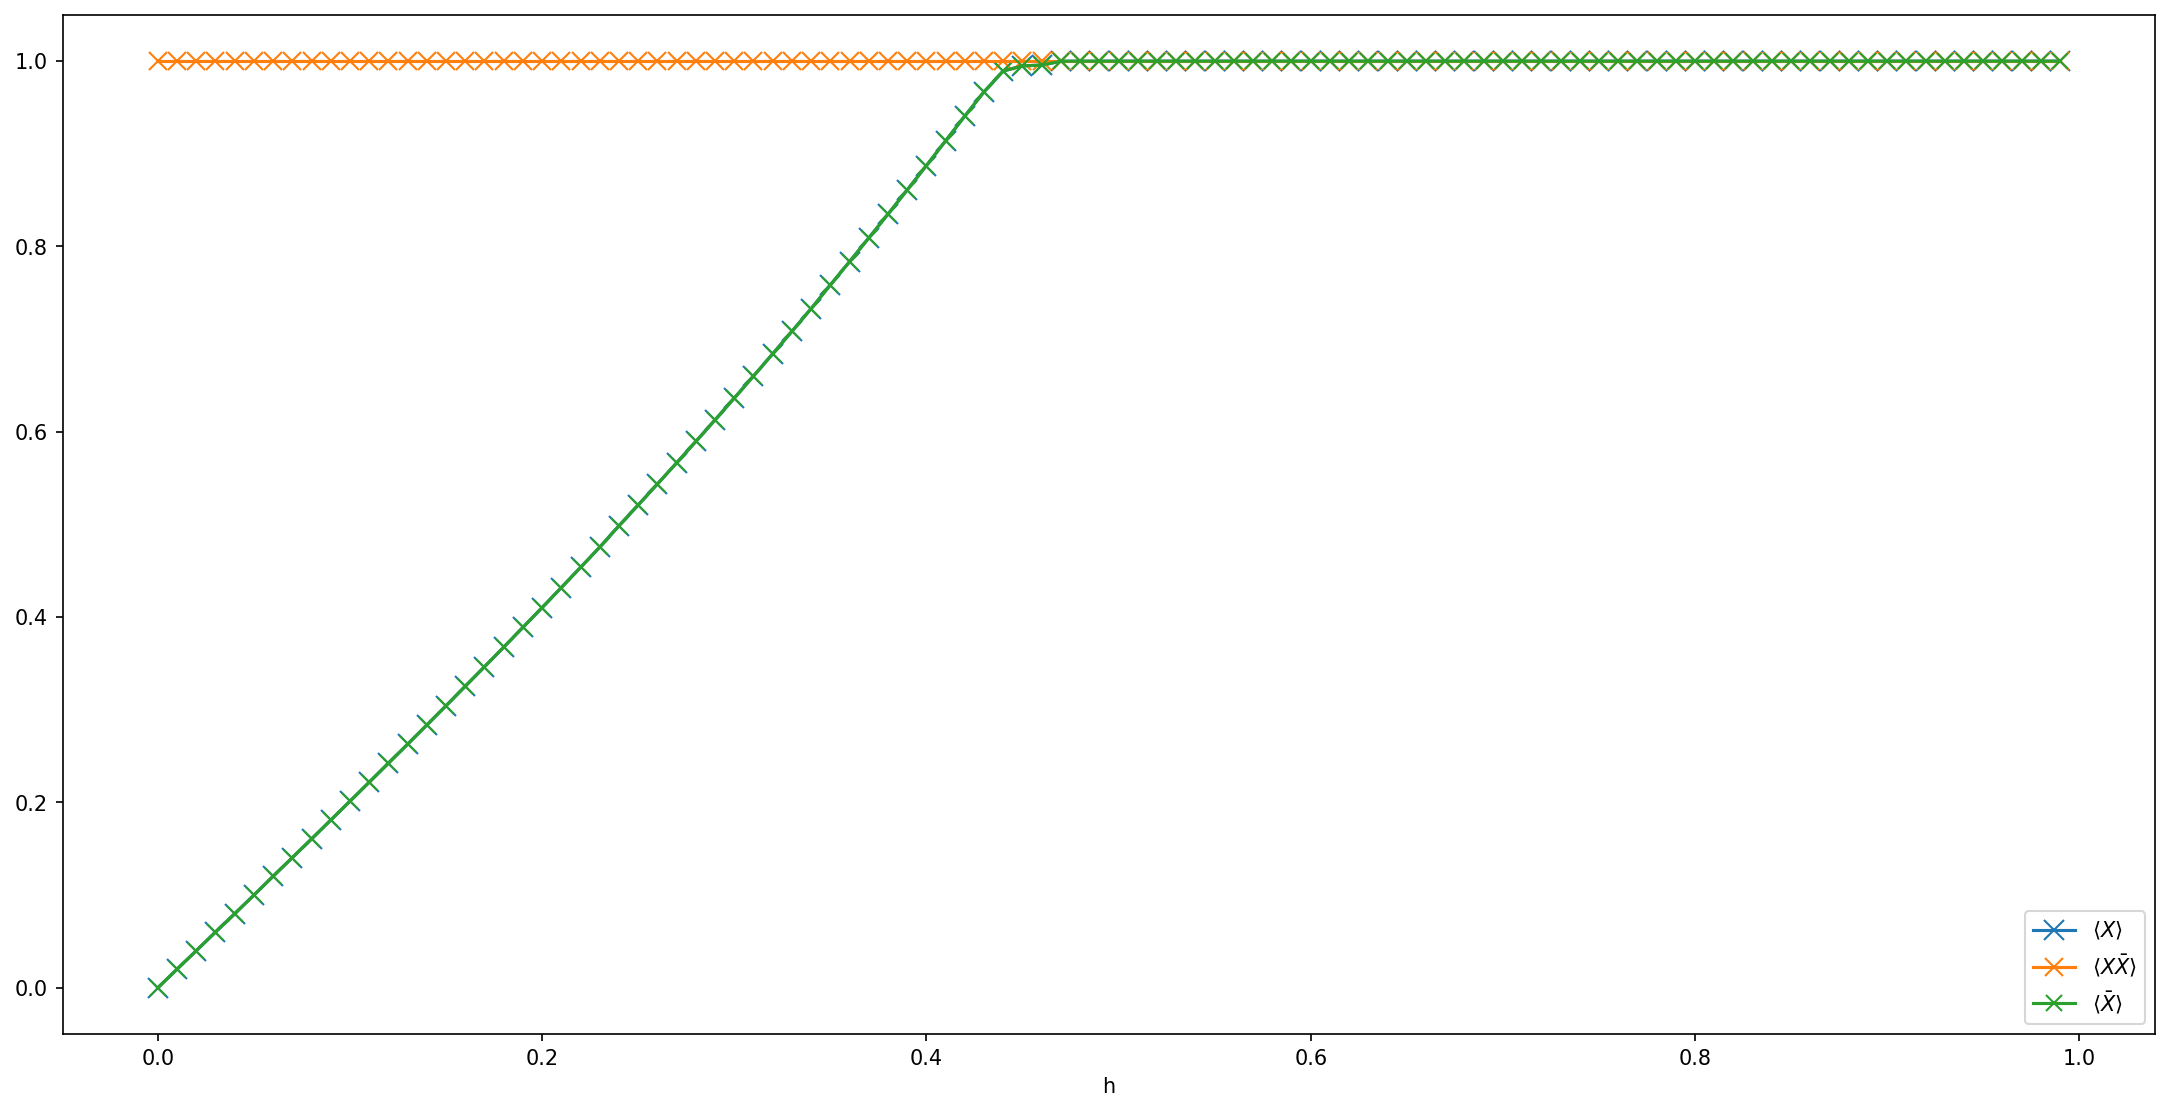

In [13]:
pyplot.figure(figsize=(18,9),dpi=150)

#pyplot.plot(rng,np.array(dim1s)/20,'-x', label = 'dim/20')

pyplot.plot(np.arange(0,1,0.01),np.abs(lamX1s),'-x',label = '$\langle X\\rangle$',markersize=10)
pyplot.plot(np.arange(0,1,0.01),np.abs(lamX12s),'-x',label = '$\langle X\\bar{X}\\rangle$',markersize=9)
pyplot.plot(np.arange(0,1,0.01),np.abs(lamX2s),'-x',label = '$\langle \\bar{X}\\rangle$',markersize=8)

"""pyplot.plot(np.arange(0,1,0.01),np.abs(lamZ1s),'-x',label = '$\langle Z\\rangle$',markersize=7)
pyplot.plot(np.arange(0,1,0.01),np.abs(lamZ12s),'-x',label = '$\langle Z\\bar{Z}\\rangle$',markersize=6)
pyplot.plot(np.arange(0,1,0.01),np.abs(lamZ2s),'-x',label = '$\langle \\bar{Z}\\rangle$',markersize=5)"""

pyplot.xlabel('h')
pyplot.legend()
pyplot.show()

In [9]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dim1s=[]
dim2s=[]
dim3s=[]

Sa1s = []
Sa2s = []
Sa3s = []
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(X,np.eye(2))
MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T4,T4])

B = np.zeros([1,1,4])
B[0,0] =(linalg.expm(0.1*Z)).reshape([4,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 15
MPS.construct_from_tensor_list([B,B])



rng = list(np.arange(0,0.4,0.01))
rng = rng+list(np.arange(0.4,0.5,0.002))
rng = rng+list(np.arange(0.5,0.8,0.01))

dim = 15
for h in rng:   
    
    h1 = 0
    h2 = h
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=dim)
    MPS_power2.update(400,1e-10)
    Sa1s.append(funcs.entropy(MPS_power2.MPS2.s[1]))
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
    lam1s.append(strap4.calculate_eig())
     
    
    dim1s.append(MPS_power2.MPS2.chi[1])
    
    print(f'current h is {h}')


current h is 0.0
current h is 0.01
current h is 0.02
current h is 0.03
current h is 0.04
current h is 0.05
current h is 0.06
current h is 0.07
current h is 0.08
current h is 0.09
current h is 0.1
current h is 0.11
current h is 0.12
current h is 0.13
current h is 0.14
current h is 0.15
current h is 0.16
current h is 0.17
current h is 0.18
current h is 0.19
current h is 0.2
current h is 0.21
current h is 0.22
current h is 0.23
current h is 0.24
current h is 0.25
current h is 0.26
current h is 0.27
current h is 0.28
current h is 0.29
current h is 0.3
current h is 0.31
current h is 0.32
current h is 0.33
current h is 0.34
current h is 0.35000000000000003
current h is 0.36
current h is 0.37
current h is 0.38
current h is 0.39
current h is 0.4
current h is 0.402
current h is 0.404
current h is 0.406
current h is 0.40800000000000003
current h is 0.41000000000000003
current h is 0.41200000000000003
current h is 0.41400000000000003
current h is 0.41600000000000004
current h is 0.418000000000000

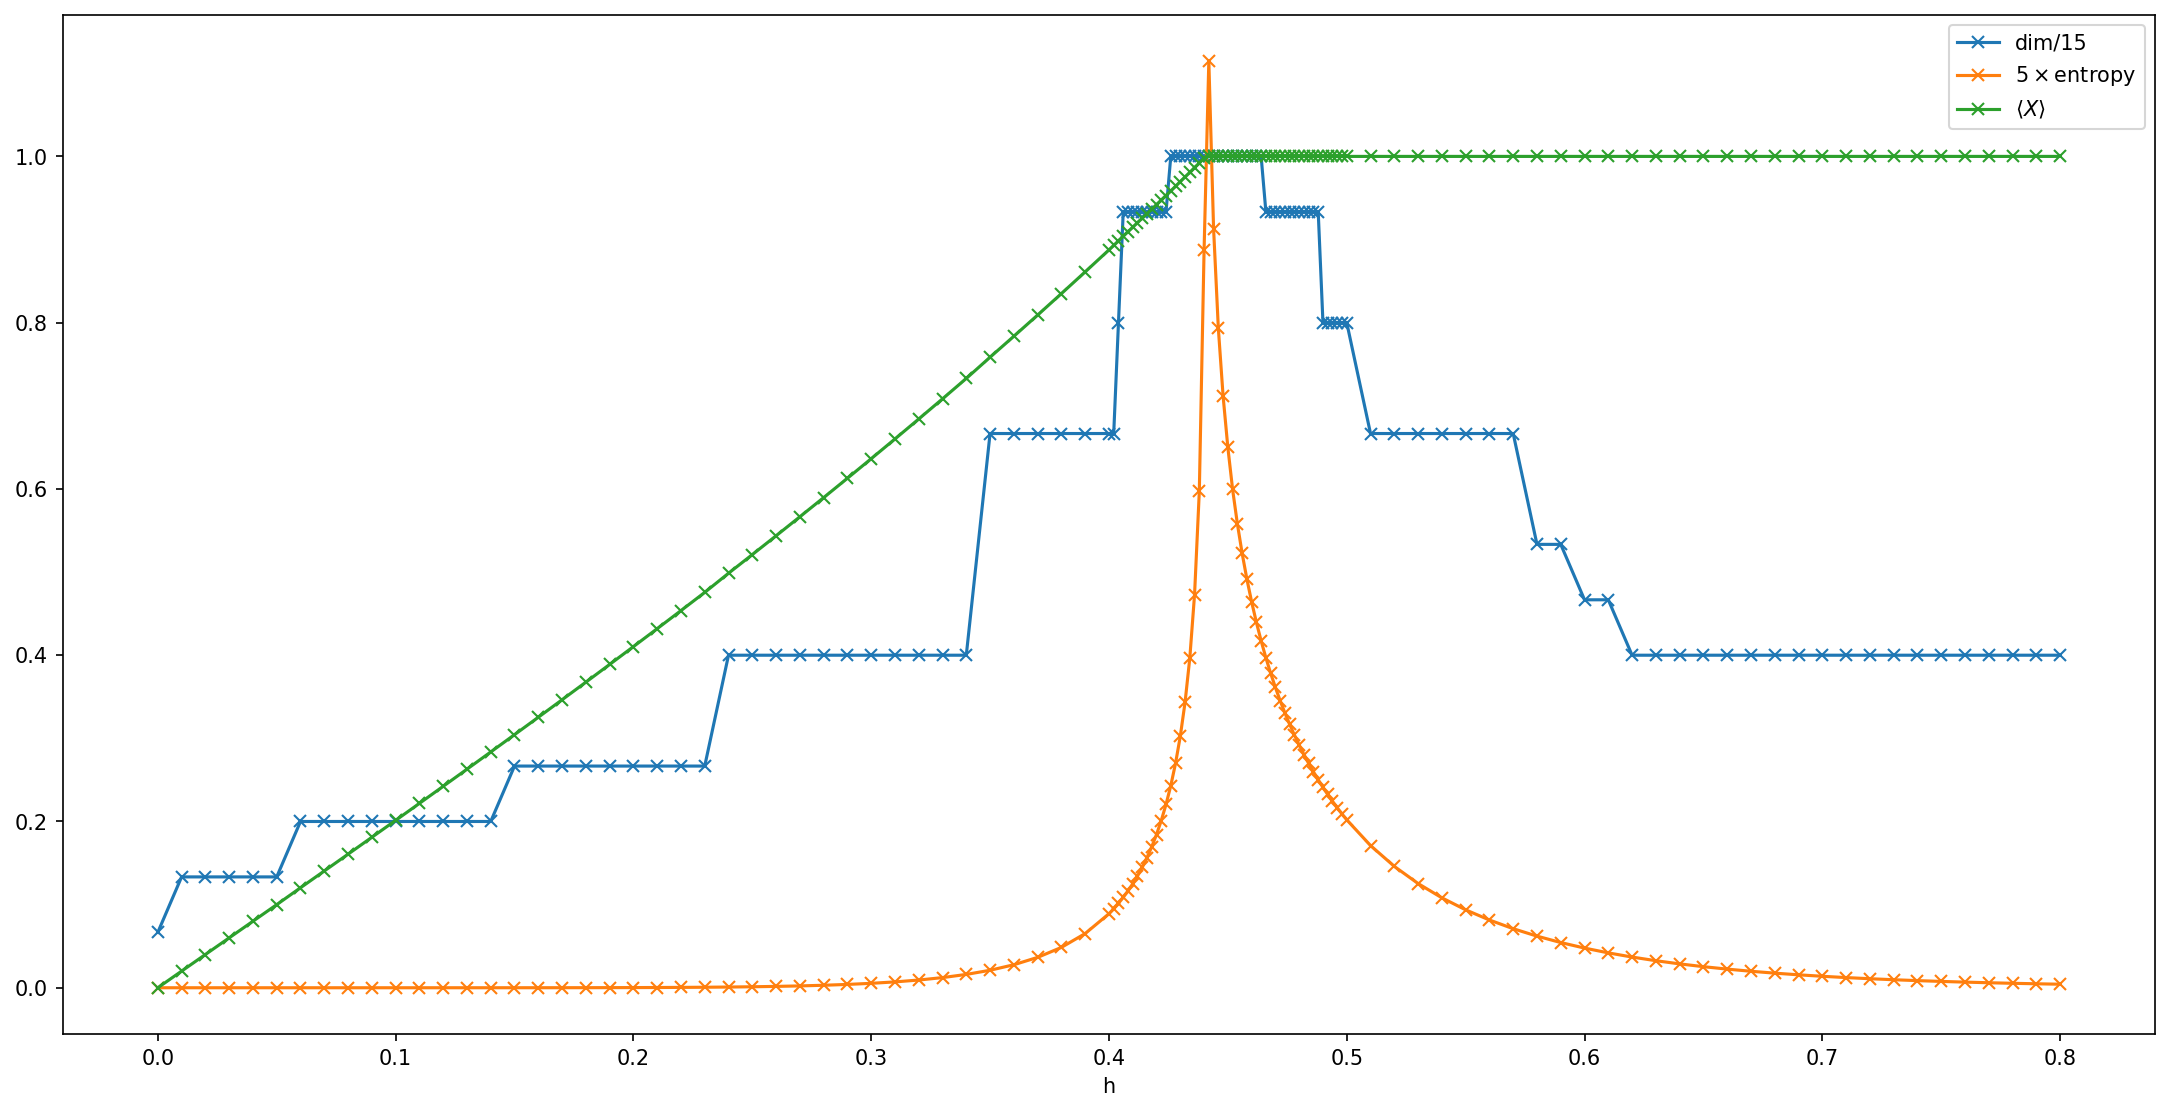

In [10]:
pyplot.figure(figsize=(18,9),dpi=150)

pyplot.plot(rng,np.array(dim1s)/15,'-x', label = 'dim/15')
pyplot.plot(rng,np.array(Sa1s)*5,'-x',label = '$5\\times$entropy')
pyplot.plot(rng,np.abs(lam1s),'-x',label = '$\langle X \\rangle$')

pyplot.xlabel('h')
pyplot.legend()
pyplot.show()

AKLT ground state

In [2]:
#exact ground state
A = np.zeros([2,2,3]) #spin1 to 2 spin1/2
A[0,0,0] = 1 
A[:,:,1] = np.array([[0,1/np.sqrt(2)],[1/np.sqrt(2),0]])
A[1,1,2] = 1

P0 = np.array([[0,1/np.sqrt(2)],[-1/np.sqrt(2),0]]) # project to spin singlet

AP0 = np.tensordot(A,P0,([1],[0]))
AP0 = np.transpose(AP0,[0,2,1])

MPS2 = iMPS.iMPS()
MPS2.construct_from_tensor_list([AP0,AP0])

In [3]:
#project operator
P2 = np.zeros([9,9])


P2[0,0] = 1
P2[8,8] = 1

v = np.zeros([3,3])
v[1,0]= 1
v[0,1] = 1
v = v/np.linalg.norm(v)
v = v.reshape([9,1])
P2+=v@v.transpose()
v = np.zeros([3,3])

v = np.zeros([3,3])
v[2,1]= 1
v[1,2] = 1
v = v/np.linalg.norm(v)
v = v.reshape([9,1])
P2+=v@v.transpose()
v = np.zeros([3,3])

v[0,2]= 1
v[2,0]= 1
v[1,1] = 2
v = v/np.linalg.norm(v)
v = v.reshape([9,1])
P2+=v@v.transpose()



In [4]:
np.linalg.norm(P2-P2@P2)

4.577566798522237e-16

In [5]:
delta = 0.1 # time interval
U = -2/3*np.eye(9)+2*P2
M = linalg.expm(-delta*U)

In [6]:
T = np.reshape(M,[3,3,3,3])
T = np.transpose(T,[0,2,1,3])
T = np.reshape(T,[9,9])

u,s,v = np.linalg.svd(T)

In [7]:
M1 = np.reshape(u@np.diag(s),[3,3,9])
M2 = np.reshape(v,[9,3,3])

trans1 = np.tensordot(M1,M2,([1],[1]))
trans1 = np.transpose(trans1,[2,1,0,3])

trans2 = np.tensordot(M2,M1,([2],[0]))
trans2 = np.transpose(trans2,[0,3,1,2])


In [8]:
MPO = iMPS.iMPO()
MPO.construct_from_tensor_list([trans1,trans2])

In [9]:
Z3= np.array([1,0.5,-0.3])
B = np.zeros([1,1,3])
B[0,0] =(np.exp(0.1*Z3)).reshape([3,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 10
MPS.construct_from_tensor_list([B,B])

In [18]:
MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=10)
MPS_power2.update(100,1e-8)
strap = iMPS.strap(MPS_power2.MPS2,None,MPS2)
abs(strap.calculate_eig())

0.9999946994031718

dims

In [42]:
lam1s=[]
dim1s=[]
Sa1s = []

X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(X,X)
MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T4,T4])

B = np.zeros([1,1,4])
B[0,0] =(linalg.expm(0.1*Z)).reshape([4,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = 3
MPS.construct_from_tensor_list([B,B])



rng = list(np.arange(0.4,0.55,0.001))

dim=3
for h in rng:   
    
    h1 = h
    h2 = 0
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=dim)
    MPS_power2.update(100,1e-8)
    Sa1s.append(funcs.entropy(MPS_power2.MPS2.s[1]))
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
    lam1s.append(strap4.calculate_eig())
     
    
    dim1s.append(MPS_power2.MPS2.chi[1])




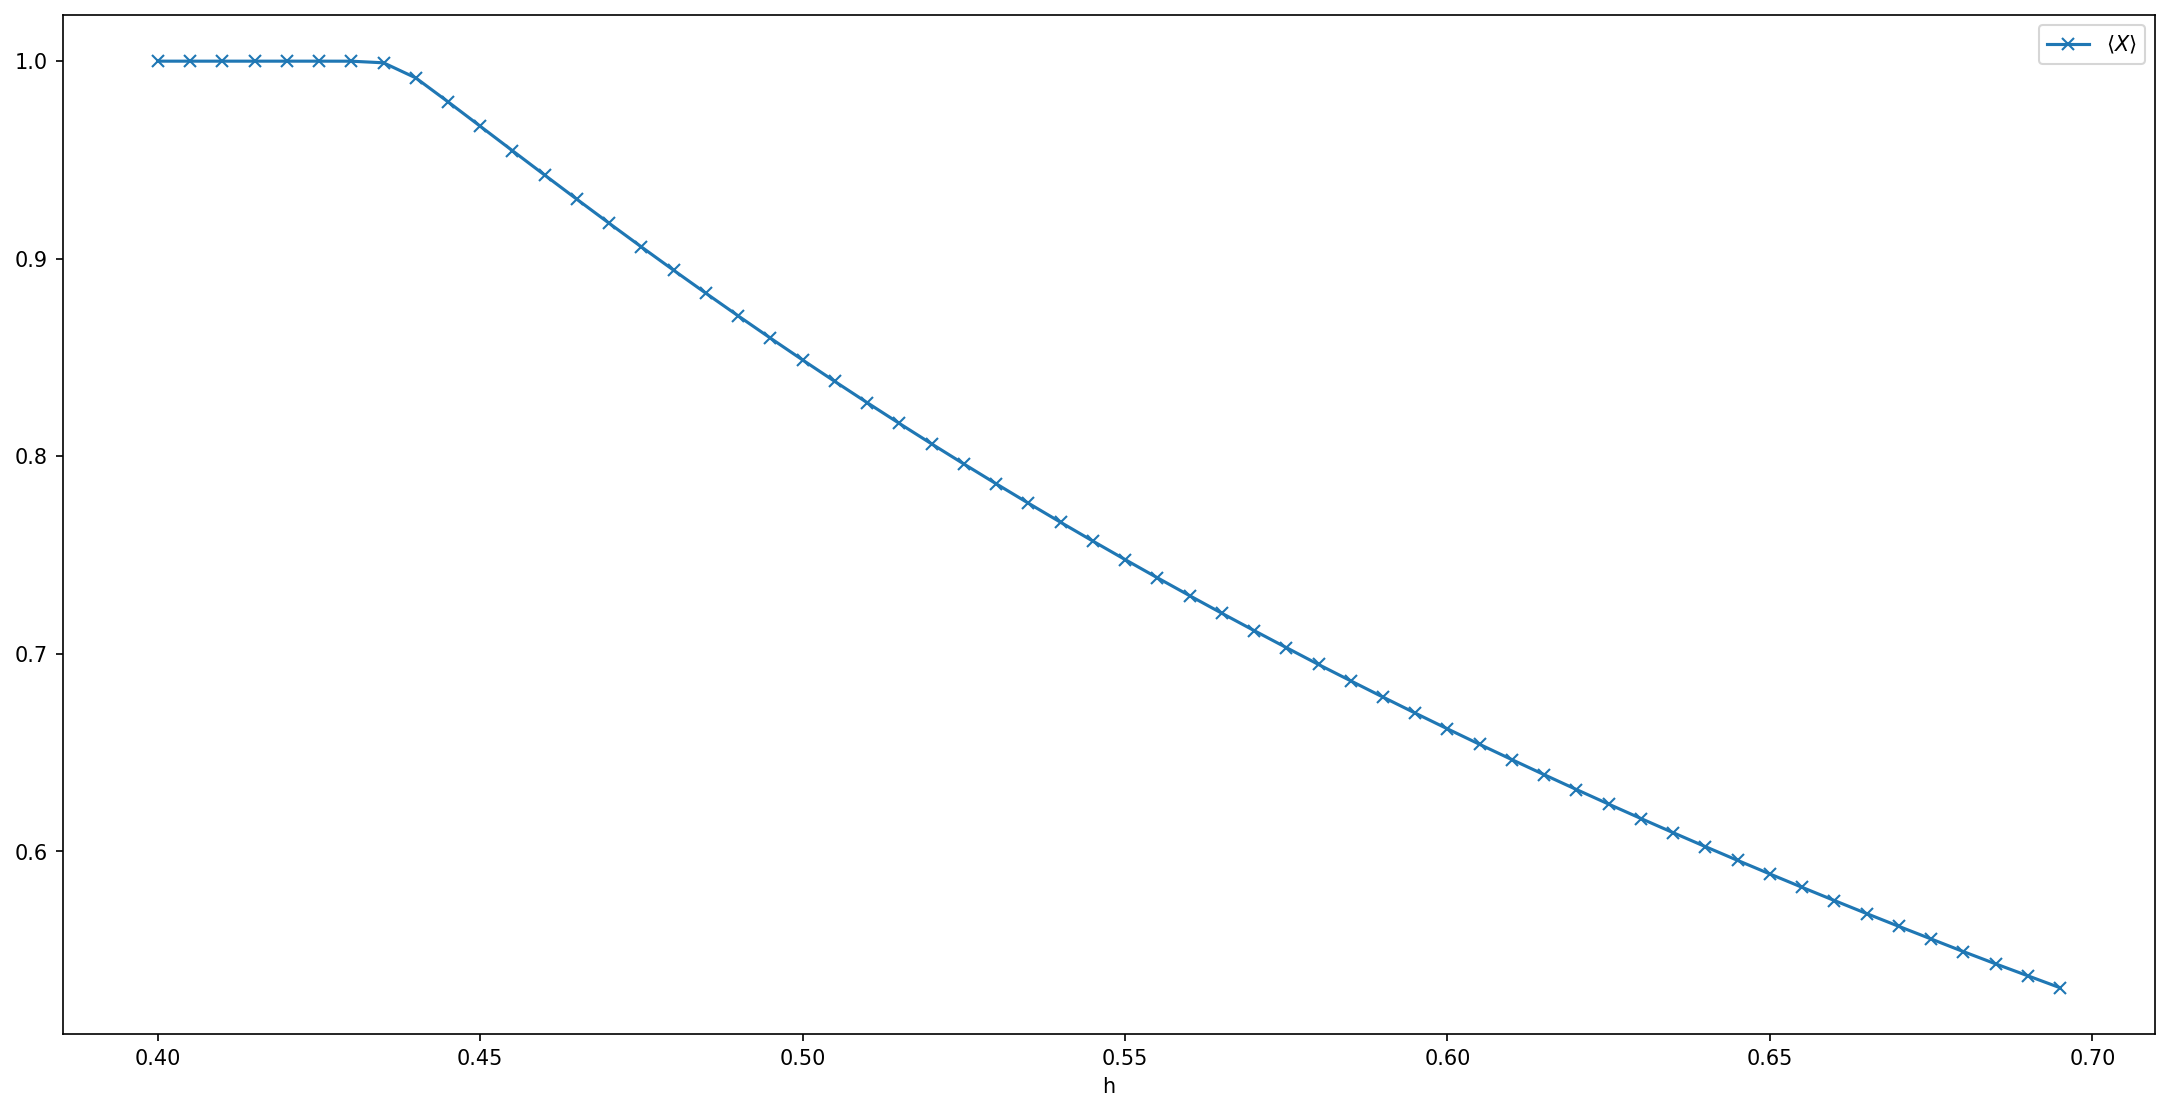

In [36]:
pyplot.figure(figsize=(18,9),dpi=150)

#pyplot.plot(rng,np.array(dim1s)/15,'-x', label = 'dim/15')
#pyplot.plot(rng,np.array(Sa1s)*5,'-x',label = '$5\\times$entropy')
pyplot.plot(rng,np.abs(lam1s),'-x',label = '$\langle X \\rangle$')

pyplot.xlabel('h')
pyplot.legend()
pyplot.show()

In [43]:
lam2s=[]
dim2s=[]
Sa2s = []

X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(X,X)
MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T4,T4])


dim=5
B = np.zeros([1,1,4])
B[0,0] =(linalg.expm(0.1*Z)).reshape([4,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = dim
MPS.construct_from_tensor_list([B,B])



rng = list(np.arange(0.4,0.55,0.001))


for h in rng:   
    
    h1 = h
    h2 = 0
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=dim)
    MPS_power2.update(100,1e-8)
    #Sa1s.append(funcs.entropy(MPS_power2.MPS2.s[1]))
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
    lam2s.append(strap4.calculate_eig())
     
    
    dim3s.append(MPS_power2.MPS2.chi[1])
    


In [44]:
lam3s=[]
dim3s=[]
Sa2s = []

X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

T4 = np.zeros([1,1,4,4])
T4[0,0,:,:] = np.kron(X,X)
MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T4,T4])


dim=15
B = np.zeros([1,1,4])
B[0,0] =(linalg.expm(0.1*Z)).reshape([4,])
MPS = iMPS.iMPS()
MPS.svd_threshold =1e-10
MPS.max_bond = dim
MPS.construct_from_tensor_list([B,B])



rng = list(np.arange(0.4,0.55,0.001))


for h in rng:   
    
    h1 = h
    h2 = 0
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])

    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=dim)
    MPS_power2.update(100,1e-9)
    #Sa1s.append(funcs.entropy(MPS_power2.MPS2.s[1]))
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
    lam3s.append(strap4.calculate_eig())
     
    
    dim3s.append(MPS_power2.MPS2.chi[1])
    
    print(f'current h is {h}')


current h is 0.4
current h is 0.401
current h is 0.402
current h is 0.403
current h is 0.404
current h is 0.405
current h is 0.406
current h is 0.40700000000000003
current h is 0.40800000000000003
current h is 0.40900000000000003
current h is 0.41000000000000003
current h is 0.41100000000000003
current h is 0.41200000000000003
current h is 0.41300000000000003
current h is 0.41400000000000003
current h is 0.41500000000000004
current h is 0.41600000000000004
current h is 0.41700000000000004
current h is 0.41800000000000004
current h is 0.41900000000000004
current h is 0.42000000000000004
current h is 0.42100000000000004
current h is 0.42200000000000004
current h is 0.42300000000000004
current h is 0.42400000000000004
current h is 0.42500000000000004
current h is 0.42600000000000005
current h is 0.42700000000000005
current h is 0.42800000000000005
current h is 0.42900000000000005
current h is 0.43000000000000005
current h is 0.43100000000000005
current h is 0.43200000000000005
current h i

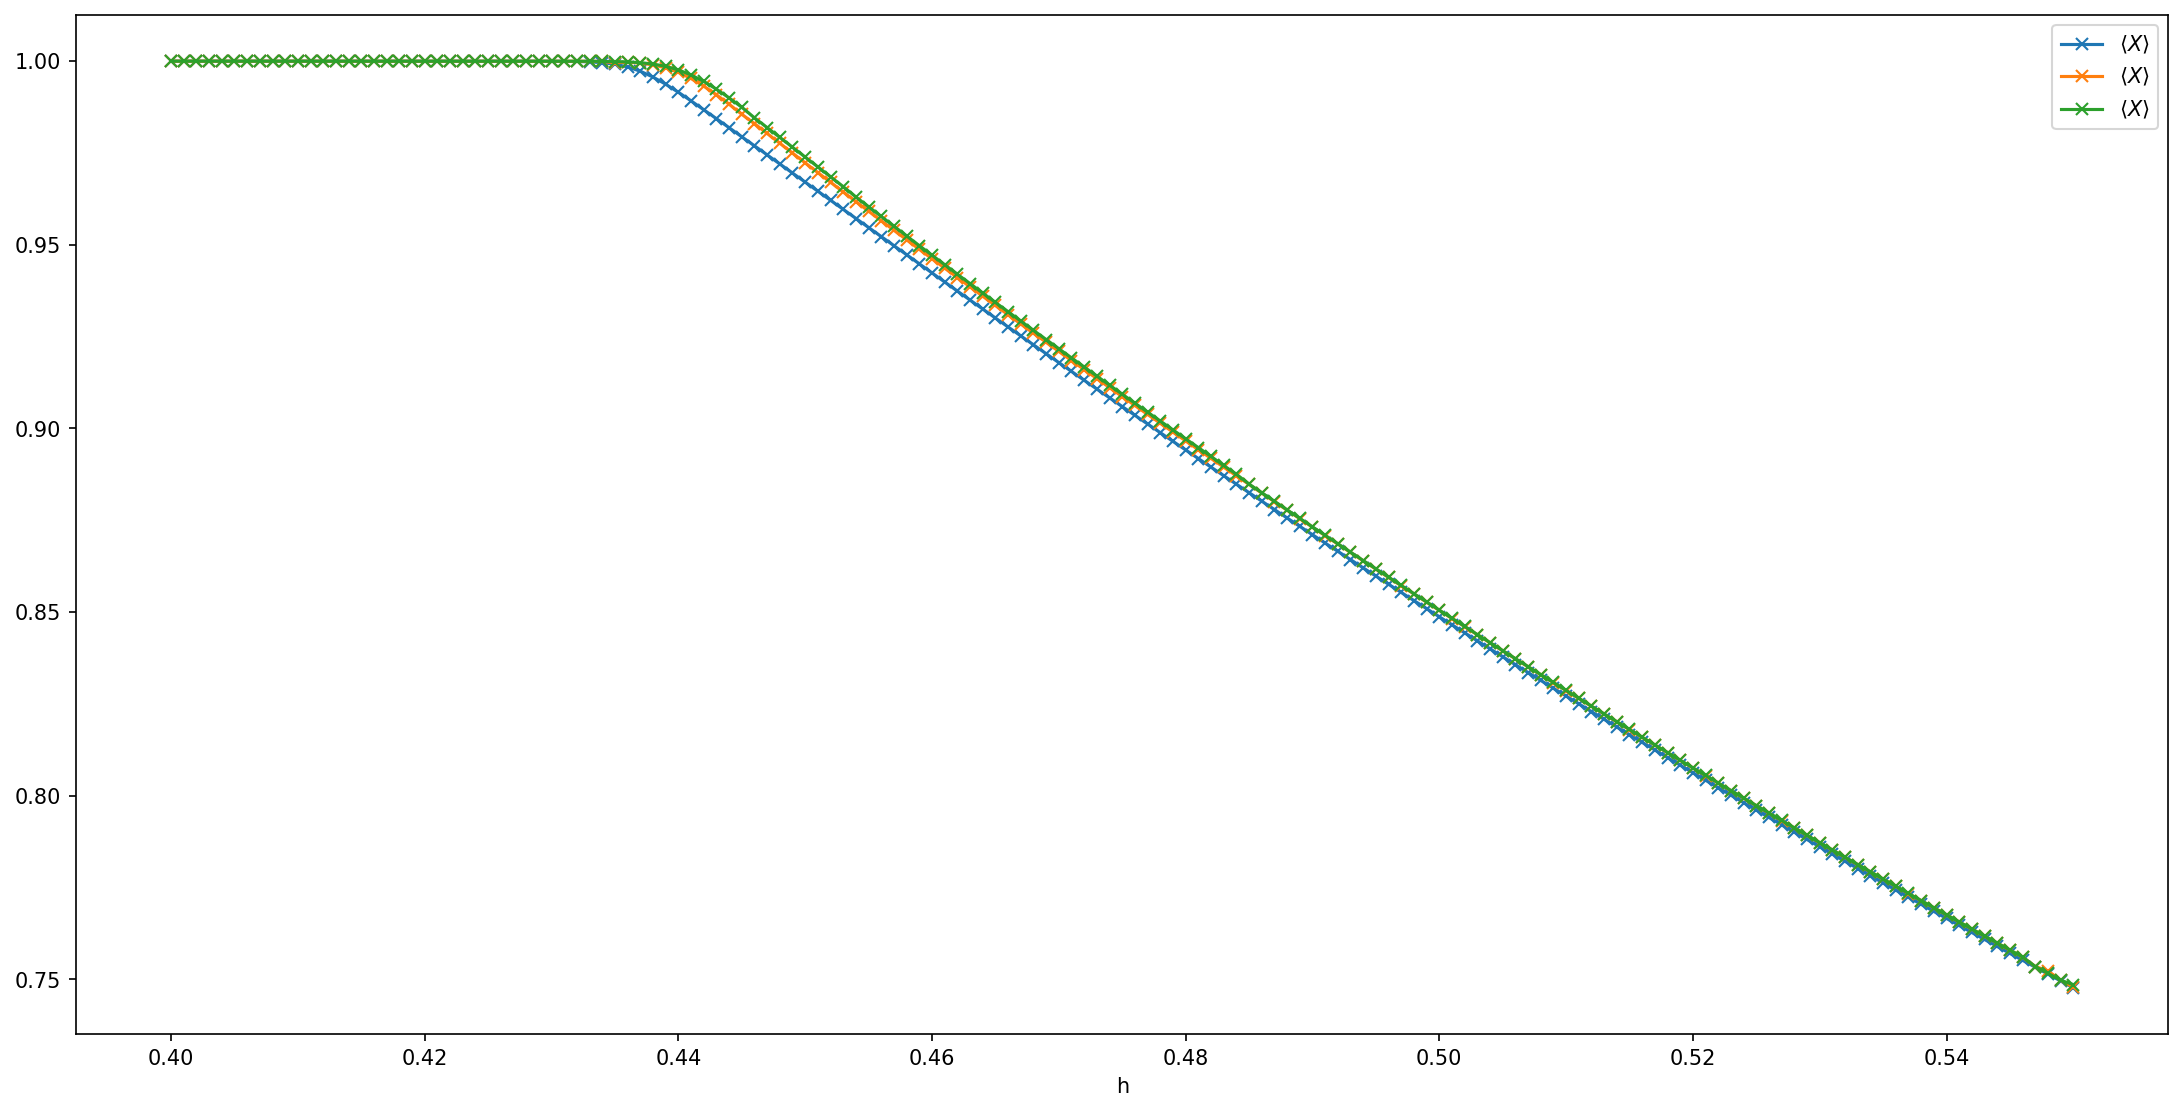

In [45]:
pyplot.figure(figsize=(18,9),dpi=150)

#pyplot.plot(rng,np.array(dim1s)/15,'-x', label = 'dim/15')
#pyplot.plot(rng,np.array(Sa1s[100:])*5,'-x',label = '$5\\times$entropy')
pyplot.plot(rng,np.abs(lam1s)[:],'-x',label = '$\langle X \\rangle$')
pyplot.plot(rng,np.abs(lam2s)[:],'-x',label = '$\langle X \\rangle$')
pyplot.plot(rng,np.abs(lam3s)[:],'-x',label = '$\langle X \\rangle$')

pyplot.xlabel('h')
pyplot.legend()
pyplot.show()